In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Merge 12 months of sales data

In [9]:
files = os.listdir('/Users/tongzhu/python_projects/sales_data')

all_sales_data = pd.DataFrame()

for i in files:
    if i.endswith('.csv'):
        df = pd.read_csv('/Users/tongzhu/python_projects/sales_data/' + i)
        all_sales_data = pd.concat([all_sales_data, df])

all_sales_data.to_csv('all_data.csv', index = False)

In [10]:
all_data = pd.read_csv('all_data.csv')

# Clean the data

## Find and drop the missing values

In [11]:
nan_df = all_data[all_data.isna().any(axis=1)] # define all rows that contained at least one NaN

all_data = all_data.dropna(how='all') # drop all rows with NaN

In [12]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

## Convert different columns into the necessary type

In [13]:
print(all_data['Quantity Ordered'].dtype)
print(all_data['Order Date'].dtype)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

object
object


## Add a month column and convert it into an int

In [14]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month']) # convert Month into an int

print(all_data['Month'].dtype)

int64


# Problem Solving:

- Question 1: What was the best month for sales? How much was earned that month?

In [15]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data = all_data[['Order ID','Product','Quantity Ordered','Price Each','Sales','Order Date','Purchase Address','Month']]

In [16]:
month = all_data.groupby('Month').sum()
month

,Quantity Ordered,Price Each,Sales
Month,,,
1,32709,5435305.14,5466770.19
2,40347,6566654.16,6606067.26
3,51015,8373623.49,8421301.14
4,61674,10103013.06,10172010.72
5,56001,9405375.39,9457820.25
6,45759,7686076.83,7733406.78
7,48216,7897618.68,7943327.28
8,40344,6691036.26,6733403.64
9,39327,6254976.27,6292680.39


In [17]:
max_month = month['Sales'].max()
print(f'December was the best month for sales, ${max_month} was earned in December.')

December was the best month for sales, $13840330.02 was earned in December.


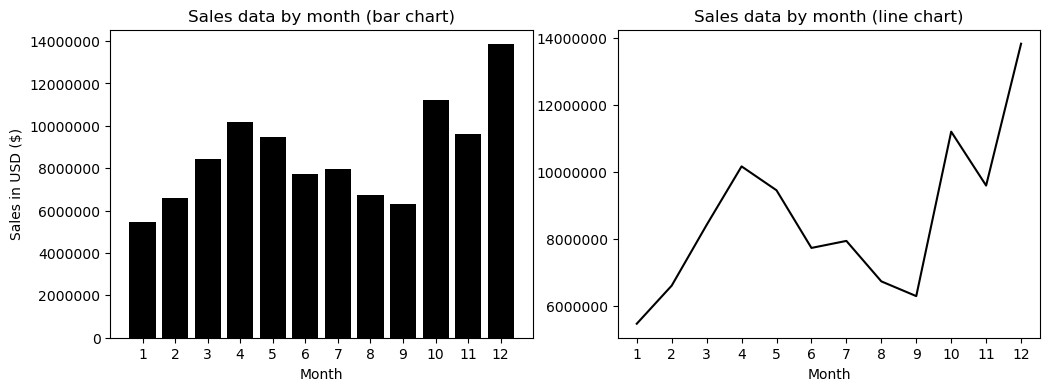

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
months = range(1,13)

ax[0].bar(months, month['Sales'], color='k')
ax[0].set_title('Sales data by month (bar chart)')
ax[0].set_xticks(months)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Sales in USD ($)')
ax[0].ticklabel_format(style='plain')

ax[1].plot(months, month['Sales'], color='k')
ax[1].set_title('Sales data by month (line chart)')
ax[1].set_xticks(months)
ax[1].set_xlabel('Month')
ax[1].ticklabel_format(style='plain')

plt.savefig('bar+line.png')
plt.show()


- Question 2: What city had the highest number of sales?

In [19]:
all_data['cities'] = all_data['Purchase Address'].str.split(',').str[1]
all_data['states'] = all_data['Purchase Address'].str.split(',').str[-1].str.split(' ').str[-2]
all_data['Cities'] = all_data['cities'].str.cat(all_data['states'], ', ')

city = all_data.groupby('Cities').sum()
city

,Quantity Ordered,Price Each,Sales,Month
Cities,,,,
"Atlanta, GA",49806,8339724.60,8386495.74,314382
"Austin, TX",33459,5429620.83,5458745.25,209487
"Boston, MA",67584,10912229.31,10984926.03,423336
"Dallas, TX",50190,8257883.46,8303926.20,313860
"Los Angeles, CA",99867,16264305.69,16357712.40,624975
"New York City, NY",83796,13906112.49,13992952.29,527223
"Portland, ME",8250,1341567.75,1349274.81,51432
"Portland, OR",33909,5581674.66,5612197.02,211863
"San Francisco, CA",150717,24634385.22,24786611.73,946560


In [20]:
max_city = city['Sales'].max()
print(f'San Francisco is the city with the highest number of sales: ${max_city}.')

San Francisco is the city with the highest number of sales: $24786611.73.


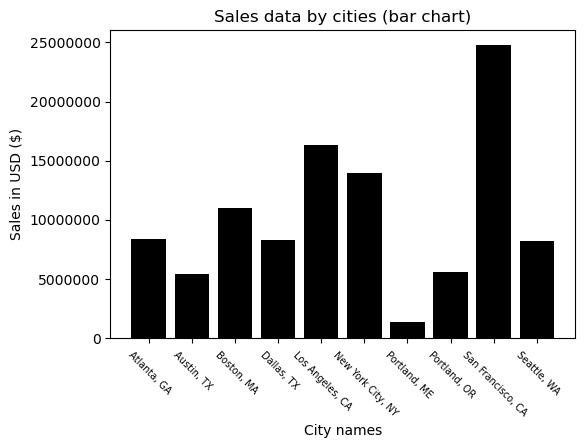

In [21]:
plt.subplots(figsize = (6,4))
plt.bar(city.index, city['Sales'], color = 'k')
plt.title('Sales data by cities (bar chart)')
plt.xticks(city.index, rotation = -45, size = 7)
plt.xlabel('City names')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(style='plain', axis = 'y')
plt.show()

- Question 3: What time should we display ads to maximize likehood of customer's buying prodcution?

In [22]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # convert Order Date into datetime format

In [23]:
all_data['Hour'] = all_data['Order Date'].dt.hour # obtain the hour of the date
all_data['Minute'] = all_data['Order Date'].dt.minute # obtain the minute of the date
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,cities,states,Cities,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,NY,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,NY,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,NY,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,"Atlanta, GA",12,38


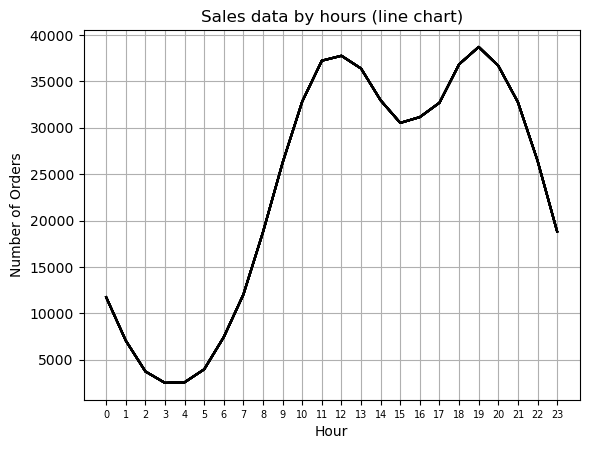

It's recommended to play ads around 11 am and 6 pm.


In [24]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(), color = 'k')
plt.xticks(hours, size = 7)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.title('Sales data by hours (line chart)')
plt.show()

print('It\'s recommended to play ads around 11 am and 6 pm.')

- Question 4: What products are most often sold together?*

In [25]:
df = all_data[all_data['Order ID'].duplicated(keep = False)] 
# finding all duplicated 'Order ID' a.k.a. sold together
# keep = False will keep all duplicates, by default keep = first will omit the first duplicate

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
# grouping the 'Product' with the same 'Order ID', join the 'Product' with a comma and a space

df = df[['Order ID', 'Grouped']].drop_duplicates()
# remove the rows with duplicated 'Order ID' so that we can count them

In [26]:
from itertools import combinations
from collections import Counter

count = Counter()

for i in df['Grouped']: # grab all objects in the column 'Grouped'
    i_list = i.split(',') # create a sublist containing objects from 'Grouped' splited by ','
    count.update(Counter(combinations(i_list, 2))) # most common purchased together pair(2) items, could be edited to 3
    
for i, j in count.most_common(10): # print the top 10 most common purchased pair(2) items
    print(i, j)

('Lightning Charging Cable', ' Lightning Charging Cable') 40657
('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)') 40590
('AA Batteries (4-pack)', ' AA Batteries (4-pack)') 40515
('USB-C Charging Cable', ' USB-C Charging Cable') 40486
('Wired Headphones', ' Wired Headphones') 35222
('Apple Airpods Headphones', ' Apple Airpods Headphones') 29892
(' USB-C Charging Cable', ' USB-C Charging Cable') 25655
('Bose SoundSport Headphones', ' Bose SoundSport Headphones') 25615
(' Lightning Charging Cable', ' Lightning Charging Cable') 24803
(' AAA Batteries (4-pack)', ' AAA Batteries (4-pack)') 21765


- Question 5: What product sold the most? Why?

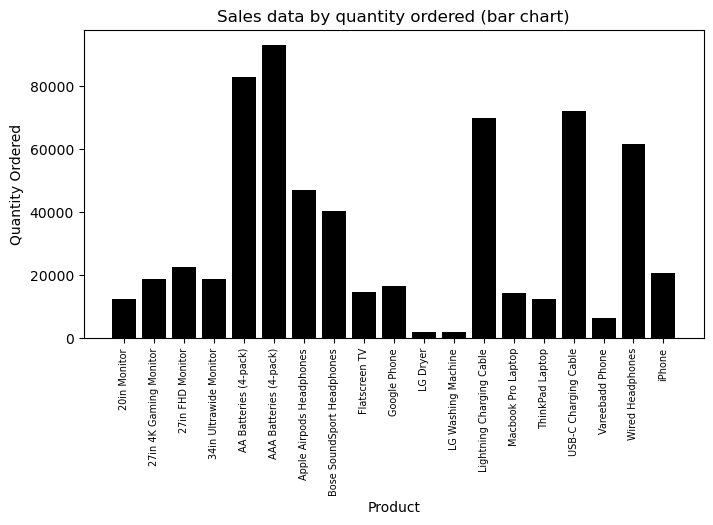

AAA batteries sold the most, mostly because it is affordable and can be used everywhere.


In [29]:
quantity_ordered = all_data.groupby('Product').sum()['Quantity Ordered']

products = [i for i, j in all_data.groupby(['Product'])]

plt.figure(figsize = (8,4))
plt.bar(products, quantity_ordered, color = 'k')
plt.title('Sales data by quantity ordered (bar chart)')
plt.xticks(products, rotation = 90, size = 7)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

print('AAA batteries sold the most, mostly because it is affordable and can be used everywhere.')

In [32]:
# to verify my point, we can look at the average price for all products
prices = all_data.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/86/k4z0qv9176vg6q0g2cxwgkmm0000gn/T/ipykernel_4589/3964360781.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 90, size = 7)


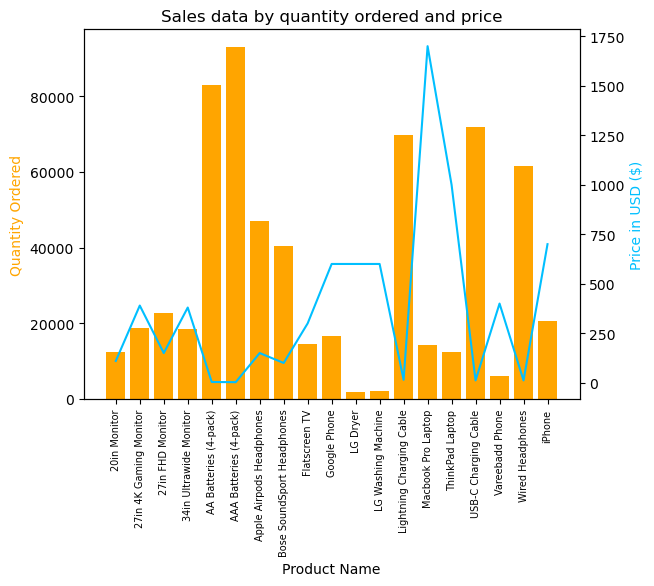

In [33]:
# we can visualize this by plotting the product price as a line chart over the product quantity ordered
# we can conclude that for most items that are cheap, the quantity ordered is high
fig, ax1 = plt.subplots()

ax1.bar(products, quantity_ordered, color = 'orange')
ax1.set_title('Sales data by quantity ordered and price')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'orange')
ax1.set_xticklabels(products, rotation = 90, size = 7)

ax2 = ax1.twinx()

ax2.plot(products, prices, color = 'deepskyblue')
ax2.set_ylabel('Price in USD ($)', color = 'deepskyblue')

plt.show()